# Tugas Besar FBD - Crop Recommendation | Kelompok 2 - Kom B

### Rekomendasi Tanaman Pertanian Berdasarkan Kandungan Tanah dan Cuaca

#### Anggota Kelompok:
1) Ade Bunga Dwi Setiayu (211402008)
2) Rizki Nabilah Wardah (211402059)
3) Daniel Andrew Ketaren (211402062)
4) Albert Nathaniel (211402089)

### Introduction and Dataset Description
#### Background Dataset:

#### Dataset: Crop Recommendation Dataset (https://www.kaggle.com/datasets/siddharthss/crop-recommendation-dataset/data)

#### SDGs Problem:
1) SDG 1: No Poverty (Tanpa Kemiskinan)
- Rekomendasi tanaman pertanian yang akurat dapat meningkatkan produktivitas pertanian sehingga petani dapat meningkatkan pendapatan dan mengurangi risiko kemiskinan.
2) SDG 2: Zero Hunger (Tanpa Kelaparan)
- Rekomendasi tanaman pertanian yang akurat dapat meningkatkan hasil pertanian dan mengoptimalkan waktu tanam dan panen. Hal ini dapat mendukung upaya mencapai ketahanan pangan dan mengurangi kelaparan.
3) SDG 9: Industry, Innovation, and Infrastructure (Industri, Inovasi, dan Infrastruktur)
- Penerapan rekomendasi tanaman pertanian sebagai bentuk inovasi dalam sektor pertanian yang dapat meningkatkan efisiensi produksi, pengelolaan sumber daya, dan infrastruktur pertanian.
4) SDG 15: Life on Land (Ekosistem Daratan)
- Pemahaman tentang kandungan tanah dan cuaca dapat membantu mengelola lahan pertanian secara berkelanjutan dan mengurangi degradasi tanah.

#### Research Question:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

Hal yang harus dilakukan sebelum preprocessing data adalah melakukan import untuk library atau pustaka yang ingin digunakan.<br> Penjelasan library yang digunakan:
- Pandas berguna untuk memproses data, memanipulasi dataset tabular, membersihkan data, hingga analisis data.
- Numpy berguna untuk melakukan operasi matematika dan mengakses array.
- Matplotlib berguna untuk visualisasi data seperti membuat grafik garis, histogram, pie chart, box plot, hexbin, dll.
- Seaborn berguna untuk visualisasi data seperti grafik statistik yang informatif dengan tema dan palet warna lebih menarik.
- Sklearn berguna untuk melakukan train test split, membangun model, dan melakukan evaluasi model.

## 1. Data Preprocessing

Data preprocessing adalah proses mengubah data ke dalam bentuk atau format yang berguna dan lebih mudah dipahami agar data siap digunakan lebih lanjut untuk ekstraksi pengetahuan.

### 1.1 Data Formatting

Pada tahap ini akan dilakukan import data

### 1.1.1 Importing Data

In [2]:
df_crop = pd.read_csv('Crop_recommendation.csv')

Kode untuk membaca file dengan ekstensi csv yang bernama "Crop_recommendation.csv" dengan pustaka pandas yang disimpan dalam df_crop.

In [3]:
df_crop

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


Memanggil tabel dataset df_crop yang telah dibaca sebelumnya.<br>
Dapat dilihat telah terbaca tabel yang berisi data dengan 2200 baris dan 8 kolom.

In [4]:
df_crop = df_crop.rename(columns={'N': 'Nitrogen (N)'})
df_crop = df_crop.rename(columns={'P': 'Phosphorous (P)'})
df_crop = df_crop.rename(columns={'K': 'Potassium (K)'})
df_crop = df_crop.rename(columns={'label': 'crop'})

Mengubah nama kolom N, P, K menjadi Nitrogen (N), Phosphorous (P), Potassium (K) agar lebih mudah dimengerti dan label menjadi crop agar lebih mencerminkan isi dari kolom tersebut.

In [5]:
df_crop.head()

,Nitrogen (N),Phosphorous (P),Potassium (K),temperature,humidity,ph,rainfall,crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


Kode untuk menampilkan lima baris pertama dalam dataframe. <br>
Dapat dilihat bahwa nama kolom telah berhasil diganti.

### 1.1.2 Data Types and Summary Statistics

In [6]:
df_crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Nitrogen (N)     2200 non-null   int64  
 1   Phosphorous (P)  2200 non-null   int64  
 2   Potassium (K)    2200 non-null   int64  
 3   temperature      2200 non-null   float64
 4   humidity         2200 non-null   float64
 5   ph               2200 non-null   float64
 6   rainfall         2200 non-null   float64
 7   crop             2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


Jika dilihat dari data types atau tipe datanya tidak ada yang janggal dari data diatas dimana untuk kolom Nitrogen (N), Phosphorous (P), Potassium (K) memiliki tipe data int64 dan kolom temperature, humidity, ph, rainfall memiliki tipe data float64 yang termasuk dalam data numerik. Untuk kolom crop sendiri bertipe data object yang termasuk dalam data kategorikal. Kolom crop merupakan variabel target dalam dataset.<br>

Penjelasan Kolom:
1) Nitrogen (N) [numerical] : Tingkat kandungan nitrogen dalam tanah. Kandungan nitrogen dapat mempengaruhi pertumbuhan dan produktivitas tanaman.
2) Phosphorous (P) [numerical] : Tingkat kandungan fosfor dalam tanah. Fosfor penting untuk penting untuk perkembangan akar, pembungaan, dan pembuahan tanaman.
3) Potassium (K) [numerical] : Tingkat kandungan kalium dalam tanah. Kalium mendukung pertumbuhan tanaman, resistensi terhadap penyakit, dan toleransi terhadap tekanan lingkungan.
4) temperature [numerical] : Kondisi termometer atau suhu udara. Tanaman memiliki suhu optimal untuk pertumbuhan yang dapat memengaruhi hasil panen.
5) humidity [numerical] : Tingkat kelembaban udara. Kelembaban dapat mempengaruhi penyerapan air oleh tanaman dan berkontribusi pada kondisi pertumbuhan yang optimal.
6) ph [numerical] : Tingkat keasaman atau kebasaan tanah. Nilai pH diukur dalam skala 0 hingga 14, di mana nilai 7 merupakan netral, nilai kurang dari 7 menunjukkan keasaman, dan nilai lebih dari 7 menunjukkan alkalinitas.
7) rainfall [numerical] : Jumlah curah hujan yang terjadi. Curah hujan dapat mempengaruhi ketersediaan air untuk tanaman.
8) crop [categorical] : Jenis tanaman yang ditanam. Ini merupakan variabel target dalam pemodelan yang menunjukkan hasil tanaman pertanian yang direkomendasikan berdasarkan kondisi lingkungan.

Oleh karena itu, dataset ini termasuk klasifikasi karena memiliki kolom target kategorikal yaitu "crop" yang menyatakan jenis tanaman pertanian. Dengan menggunakan fitur-fitur seperti tingkat nitrogen, fosfor, kalium, suhu, kelembaban, pH, dan curah hujan dapat dilakukan prediksi jenis tanaman pertanian yang cocok.

In [29]:
df_crop.describe().T

,count,mean,std,min,25%,50%,75%,max
Nitrogen (N),2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
Phosphorous (P),2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
Potassium (K),2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
temperature,2200.0,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
humidity,2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
ph,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall,2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


In [20]:
# Mengklasifikasikan data menjadi variabel numerik dan kategorikal
numerical_df = df_crop.select_dtypes(exclude=['object'])
categorical_df = df_crop.select_dtypes(include=['object'])

Membuat dua dataframe baru untuk data numerik dan kategorikal dimana untuk dataframe numerik berisi kolom bertipe data selain object dan dataframe kategorikal berisi kolom bertipe data object.

In [21]:
numerical_df.head()

,Nitrogen (N),Phosphorous (P),Potassium (K),temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


Menampilkan lima baris pertama dataframe yang berisi data numerik.

In [22]:
categorical_df.head()

,crop
0,rice
1,rice
2,rice
3,rice
4,rice


Menampilkan lima baris pertama dataframe yang berisi data kategorikal.

In [23]:
# Menghitung skewness dan kurtosis dari kolom dengan data numerik
skewness = numerical_df.skew()
kurtosis = numerical_df.kurtosis()

# Membuat dataframe baru untuk menampilkan hasil perhitungan
skew_kurt_df = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis})

skew_kurt_df

,Skewness,Kurtosis
Nitrogen (N),0.509721,-1.058240
Phosphorous (P),1.010773,0.860279
Potassium (K),2.375167,4.449354
temperature,0.184933,1.232555
humidity,-1.091708,0.302134
ph,0.283929,1.655581
rainfall,0.965756,0.607079


Skewness dan kurtosis adalah dua ukuran statistik yang digunakan untuk menggambarkan bentuk distribusi probabilitas suatu variabel acak. Skewness mengukur sejauh mana distribusi simetris atau tidak simetris dan kurtosis mengukur sejauh mana ekor distribusi lebih atau kurang tebal dibandingkan dengan distribusi normal.

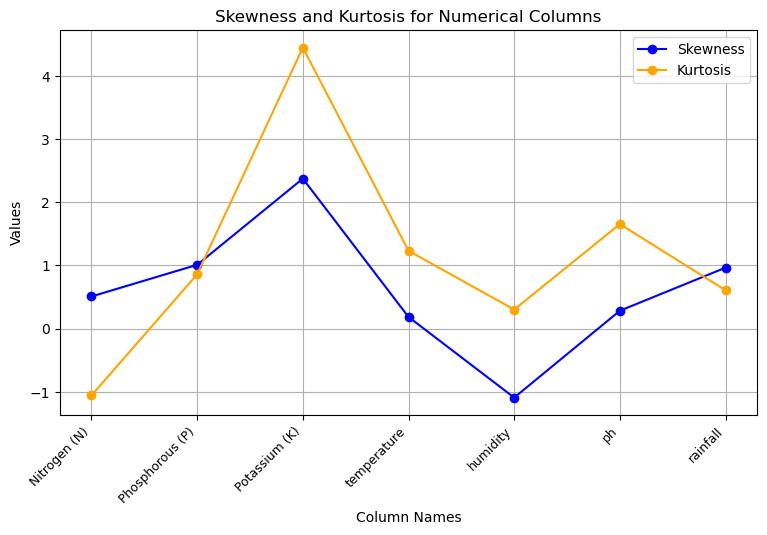

In [32]:
# Membuat objek figur untuk plot
plt.figure(figsize=(9, 5))

# Plot garis untuk skewness
plt.plot(skew_kurt_df.index, skew_kurt_df['Skewness'], marker='o', linestyle='-', color='blue', label='Skewness')
# Plot garis untuk kurtosis
plt.plot(skew_kurt_df.index, skew_kurt_df['Kurtosis'], marker='o', linestyle='-', color='orange', label='Kurtosis')

# Menambahkan judul dan label sumbu
plt.title('Skewness and Kurtosis for Numerical Columns')
plt.xlabel('Column Names')
plt.ylabel('Values')

# Menambahkan legenda
plt.legend()
# Menampilkan grid
plt.grid(True)
# Mengatur ukuran teks, rotasi, dan penempatan teks
plt.xticks(skew_kurt_df.index, skew_kurt_df.index, fontsize=9, rotation=45, ha='right') 

# Menampilkan grafik
plt.show()

Penjelasan Skewness dan Kurtosis untuk Kolom Numerik :
1) Nitrogen (N) : Fitur nitrogen menunjukkan skewness positif sebesar 0.510, yang mengindikasikan adanya ekor yang lebih panjang di sebelah kanan distribusinya. Nilai kurtosis sebesar -1.058 mengisyaratkan bahwa distribusi nitrogen adalah platykurtik, yang menunjukkan ekor yang lebih ringan dan lebih sedikit outlier dibandingkan dengan distribusi normal.
2) Phosphorous (P) : Fitur fosfor menunjukkan skewness positif sebesar 1.011, yang mengindikasikan adanya ekor yang lebih panjang di sebelah kanan distribusinya. Nilai kurtosis sebesar 0.860 mengisyaratkan bahwa distribusi fosfor adalah mesokurtik, yang menunjukkan ekor yang mendekati distribusi normal dan kemungkinan adanya outlier.
3) Potassium (K) : Fitur kalium menunjukkan skewness positif sebesar 2.375 yang mengindikasikan adanya ekor yang lebih panjang di sebelah kanan distribusinya. Nilai kurtosis sebesar 4.449 mengisyaratkan bahwa distribusi kalium adalah leptokurtik, yang menunjukkan ekor yang lebih berat dan potensi yang lebih tinggi untuk adanya outlier.
4) temperature : Fitur temperatur menunjukkan skewness sedikit positif sebesar 0.185 yang mengindikasikan adanya ekor kecil di sebelah kanan distribusinya. Nilai kurtosis sebesar 1.233 mengisyaratkan bahwa distribusi temperatur adalah leptokurtik, yang menunjukkan adanya ekor yang lebih berat dan kemungkinan adanya outlier.
5) humidity : Fitur kelembaban menunjukkan skewness negatif sebesar -1.092 yang mengindikasikan adanya ekor yang lebih panjang di sebelah kiri distribusinya. Nilai kurtosis sebesar 0.302 mengisyaratkan bahwa distribusi kelembaban adalah platykurtik, yang menunjukkan ekor yang lebih ringan dan lebih sedikit outlier dibandingkan dengan distribusi normal. 
6) ph : Fitur ph menunjukkan skewness sedikit positif sebesar 0.284 yang mengindikasikan adanya ekor kecil di sebelah kanan distribusinya. Nilai kurtosis sebesar 1.656 mengisyaratkan bahwa distribusi ph adalah leptokurtik, yang menunjukkan ekor yang lebih berat dan potensi lebih tinggi untuk adanya outlier.
7) rainfall : Fitur curah hujan menunjukkan skewness positif sebesar 0.966 yang mengindikasikan adanya ekor yang lebih panjang di sebelah kanan distribusinya. Nilai kurtosis sebesar 0.607 mengisyaratkan bahwa distribusi curah hujan adalah platykurtik, yang menunjukkan ekor yang lebih ringan dan lebih sedikit outlier dibandingkan dengan distribusi normal.

### 1.1.3 Check Duplicate Data

In [30]:
duplicate_rows = df_crop.duplicated().sum()
print ("Number of Duplicate Rows:", duplicate_rows)

Number of Duplicate Rows: 0


### 1.3 Check Null Values

In [15]:
missing_values = df_crop.isnull().sum()
missing_values

Nitrogen (N)       0
Phosphorous (P)    0
Potassium (K)      0
temperature        0
humidity           0
ph                 0
rainfall           0
crop               0
dtype: int64

### 1.4 Check Duplicate Data

In [16]:
duplicate_rows = df_crop.duplicated().sum()
print ("Number of Duplicate Rows:", duplicate_rows)

Number of Duplicate Rows: 0


### 1.5 Check Unique Value in Each Column

In [17]:
for column in df_crop.columns:
    unique_value = len(df_crop[column].unique())
    print(f"{column} : {unique_value} Unique Value")

Nitrogen (N) : 137 Unique Value
Phosphorous (P) : 117 Unique Value
Potassium (K) : 73 Unique Value
temperature : 2200 Unique Value
humidity : 2200 Unique Value
ph : 2200 Unique Value
rainfall : 2200 Unique Value
crop : 22 Unique Value


## 2. Data Preprocessing and Cleansing

### 2.1 Handling Missing Values

In [18]:
total_cells = np.product(df_crop.shape)
total_missing = missing_values.sum()

percent_missing = (total_missing/total_cells) * 100
print("Missing Value Percentage:",percent_missing,"%")

Missing Value Percentage: 0.0 %


### 2.2 Data Cleansing

### 2.3 Check Target Variable Distribution

In [33]:
df_crop['crop'].value_counts()

crop
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [ ]:
bplot = sns.countplot(y='label',data=df_crop, palette="muted")
bplot.set_ylabel('Crops', fontsize=10)
bplot.set_xlabel('Count', fontsize=10) 
bplot.tick_params(labelsize=8)

### 2.4 Feature Engineering

## 3. Visualization

### 3.1 Correlation Plot for Numerical Variables

In [ ]:
numeric_df = df_crop.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 5))
heatmap = sns.heatmap(numeric_df.corr(), vmin=-1, vmax=1, annot=True, mask=np.triu(numeric_df.corr(), k=1))
heatmap.set_title('Correlation Heatmap')
plt.show()

### 3.2 Univariate Visualization

### 3.2.1 Numerical Variables

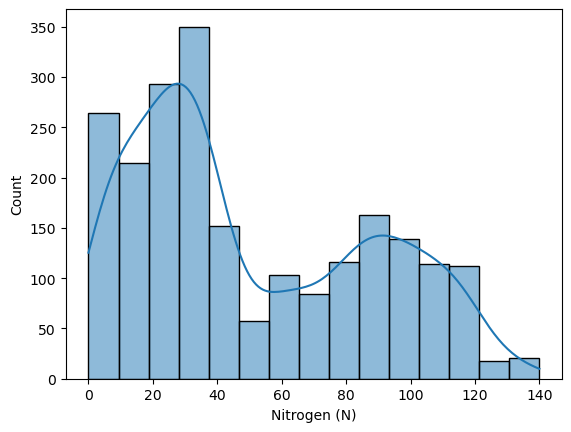

In [34]:
fig = plt.figure()  
ax = sns.histplot(data = df_crop, x='Nitrogen (N)', kde='True')
plt.show()

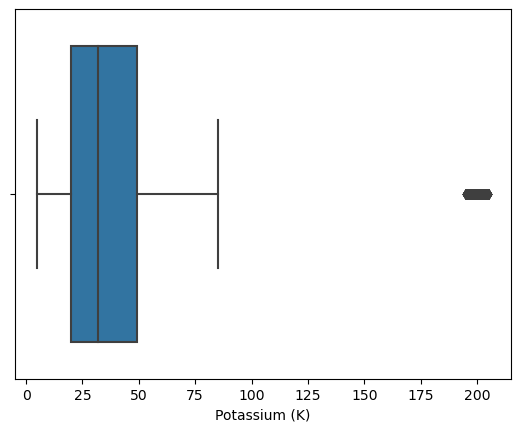

In [61]:
fig = plt.figure()  
ax = sns.boxplot(data = df_crop, x = 'Potassium (K)')
plt.show()

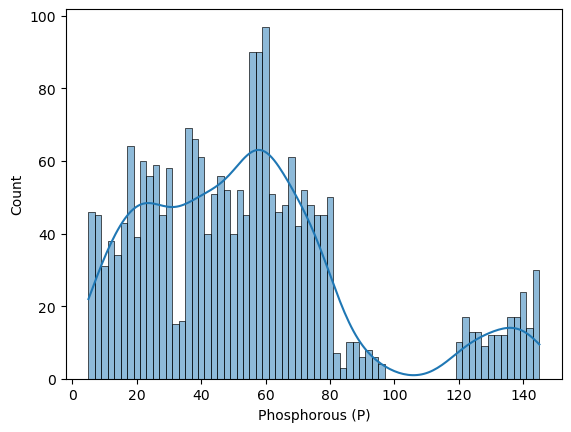

In [35]:
fig = plt.figure()  
ax = sns.histplot(data = df_crop, x='Phosphorous (P)', kde='True', binwidth=2)
plt.show()

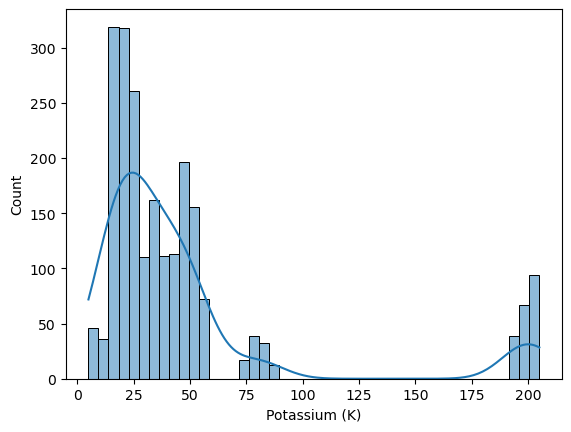

In [36]:
fig = plt.figure()  
ax = sns.histplot(data = df_crop, x='Potassium (K)', kde='True')
plt.show()

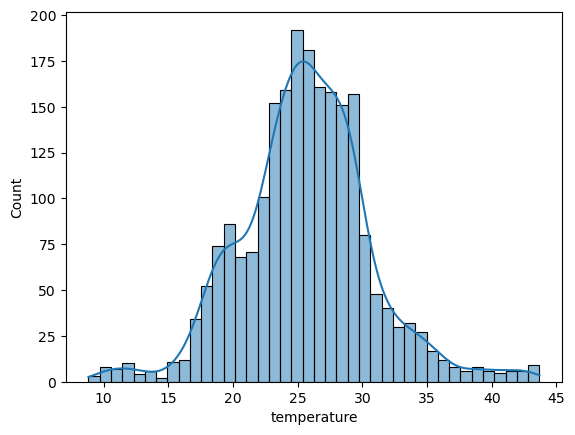

In [46]:
fig = plt.figure()  
ax = sns.histplot(data = df_crop, x='temperature', kde='True')
plt.show()

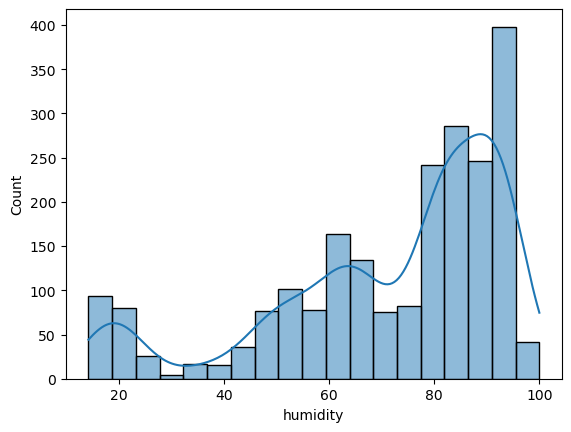

In [60]:
fig = plt.figure()  
ax = sns.histplot(data = df_crop, x='humidity', kde='True')
plt.show()

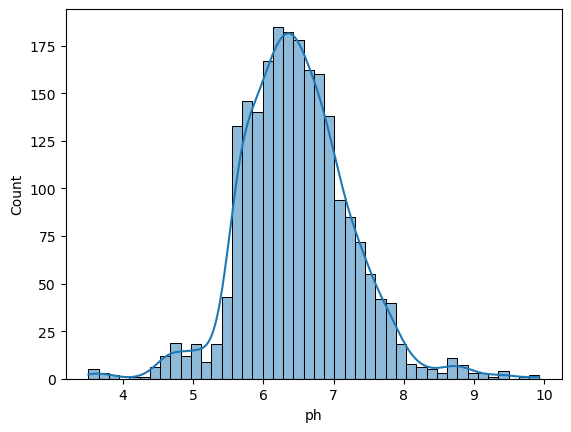

In [62]:
fig = plt.figure()  
ax = sns.histplot(data = df_crop, x='ph', kde='True')
plt.show()

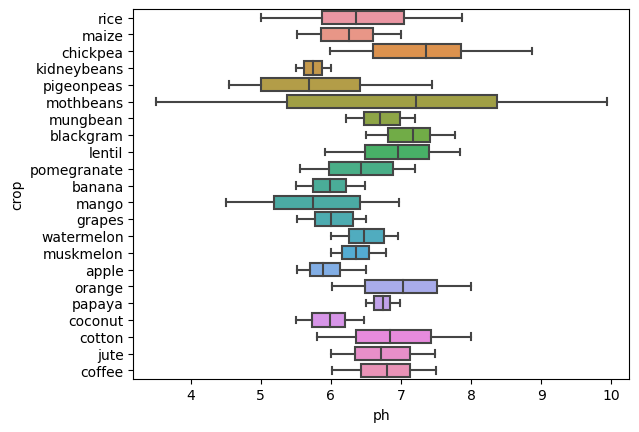

In [63]:
fig = plt.figure()  
ax = sns.boxplot(data = df_crop, x = 'ph', y = 'crop')
plt.show()

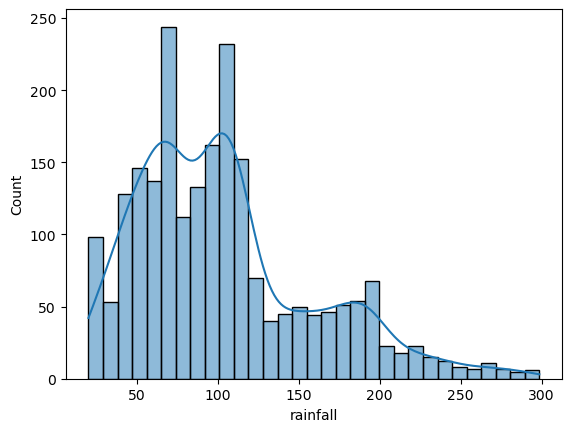

In [64]:
fig = plt.figure()  
ax = sns.histplot(data = df_crop, x='rainfall', kde='True')
plt.show()

### 3.2.2 Categorical Variables

In [ ]:
fig = plt.figure()  
ax = sns.histplot(data = df_crop, x='label', kde='True')
plt.show()

### 3.3 Bivariate Visualization

### 3.4 Multivariate Visualization

In [ ]:
sns.pairplot(df_crop, hue = 'label')

## 4. Exploratory Data Analysis (EDA)

### 4.1

In [ ]:
# encoder = LabelEncoder()
# df_crop.label = encoder.fit_transform(df_crop.label)
# features = df_crop.drop("label", axis=1)
# target = df_crop.label
# X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42)

In [ ]:
# lr = LinearRegression().fit(X_train, y_train)
# lr_pred= lr.score(X_test, y_test)

# print("Training score: {:.3f}".format(lr.score(X_train, y_train)))
# print("Test score: {:.3f}".format(lr.score(X_test, y_test)))

In [ ]:
from sklearn.model_selection import train_test_split
X = df_crop.loc[:, df_crop.columns != 'label']
y = df_crop["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=42)

from sklearn import tree

dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

In [ ]:
y_dtree = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print("Akurasi DT:",accuracy_score(y_test, y_dtree))

In [ ]:
from sklearn.metrics import precision_score

print("Precision DT:",precision_score(y_test, y_dtree, average='macro'))

In [ ]:
from sklearn.metrics import classification_report

print("Decision Tree:\n", classification_report(y_test, y_dtree))


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print("Confusion Matrix DT:\n",confusion_matrix(y_test, y_dtree))


In [ ]:
cm_dt = confusion_matrix(y_test, y_dtree)
ConfusionMatrixDisplay(cm_dt, dtree.classes_).plot()

In [ ]:
# Membuat figur dan subplots dengan 2 baris dan 1 kolom
fig, axes = plt.subplots(2, 1, figsize=(8, 8))

# Scatterplot pertama
# Menggunakan Color Palette bernama Set1 dari library scatterplot
sns.scatterplot(data=df_crop, x='ph', y='humidity', hue='label', palette='Set1', ax=axes[0])
axes[0].set_xlabel('Mass of Penguins (in grams)')
axes[0].set_ylabel('Flipper Length (in mm)')
axes[0].set_title('Body Mass vs Flipper Length in Penguins')

# Scatterplot kedua
sns.scatterplot(data=df_crop, x='ph', y='humidity', hue='label', palette='Set1', ax=axes[1])
axes[1].set_xlabel('Mass of Penguins (in grams)')
axes[1].set_ylabel('Bill Length (in mm)')
axes[1].set_title('Body Mass vs Bill Length in Penguins')

# Menambahkan legenda
axes[0].legend(title='island', loc='upper left')
axes[1].legend(title='island', loc='upper left')

# Mengatur tata letak subplot
plt.tight_layout()

# Menampilkan plot
plt.show()